In [1]:
import pandas as pd
import numpy as np

import seaborn as sns

Observe Dataset

In [5]:
#df = pd.read_csv('/content/sentiment_tweets3.csv')
df = pd.read_csv('sentiment_tweets3.csv', encoding='unicode_escape')

In [6]:
df.head()

,Index,message to examine,label (depression result)
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [7]:
df['label (depression result)'].value_counts()

label (depression result)
0    8000
1    2314
Name: count, dtype: int64

In [8]:
selected_rows = df[df['label (depression result)'] == 0].head(2314)

In [9]:
selected_rows1= df[df['label (depression result)'] == 1].head(2314)

In [10]:
combined_df = pd.concat([selected_rows1,selected_rows], ignore_index=True)

In [11]:
combined_df['label (depression result)'].value_counts()

label (depression result)
1    2314
0    2314
Name: count, dtype: int64

In [12]:
combined_df.tail()

,Index,message to examine,label (depression result)
4623,235935,"my BIS connection is KapuT, no BBM, feels lonely",0
4624,236037,I love how non-chalant &amp; blunt Tony Montan...,0
4625,236412,Glad to have gotten outta bed on my way back ...,0
4626,236419,@FRin323 none of that!! I can't wait!!! so wh...,0
4627,236420,@brendax &lt;333333333 love you!,0


In [13]:
combined_df.loc[1031]['message to examine']

"@cuzyourehotshot @lovelyzband @infinitens97 it's not depression it's anxiety and i will let her know <Emoji: Face with tears of joy>"

In [14]:
combined_df.loc[3]['message to examine']

'Made myself a tortilla filled with pb&j. My depression is cured. Olivia:1 depression:0'

In [15]:
combined_df.loc[1234]['message to examine']

"@Psychobiotic @ajit9988 It's intriguing...but...I hear people talking about probiotics for depression and I wonder...is this vitamin supplements and herbal remedies for millennials approaching middle age?"

In [16]:
combined_df.isnull().sum()

Index                        0
message to examine           0
label (depression result)    0
dtype: int64

In [17]:
# Check if there's any number

for i in combined_df['message to examine']:
  for j in i.split():
    if j.isdigit():
      s = "yes"
    else:
      s = "no"
print(s)

no


**Remove Numbers**

In [18]:
import re

In [19]:
# First Remove all the numbers

def remove_numbers(text):
  return ' '.join([i for i in str(text).split() if not i.isdigit()])

combined_df['clean_tweets'] = combined_df['message to examine'].apply(lambda x: remove_numbers(x))

In [20]:
combined_df

,Index,message to examine,label (depression result),clean_tweets
0,800000,The lack of this understanding is a small but ...,1,The lack of this understanding is a small but ...
1,800001,i just told my parents about my depression and...,1,i just told my parents about my depression and...
2,800002,depression is something i don't speak about ev...,1,depression is something i don't speak about ev...
3,800003,Made myself a tortilla filled with pb&j. My de...,1,Made myself a tortilla filled with pb&j. My de...
4,800004,@WorldofOutlaws I am gonna need depression med...,1,@WorldofOutlaws I am gonna need depression med...
...,...,...,...,...
4623,235935,"my BIS connection is KapuT, no BBM, feels lonely",0,"my BIS connection is KapuT, no BBM, feels lonely"
4624,236037,I love how non-chalant &amp; blunt Tony Montan...,0,I love how non-chalant &amp; blunt Tony Montan...
4625,236412,Glad to have gotten outta bed on my way back ...,0,Glad to have gotten outta bed on my way back h...
4626,236419,@FRin323 none of that!! I can't wait!!! so wh...,0,@FRin323 none of that!! I can't wait!!! so whe...


In [21]:
# Lowercasing all the tweets

combined_df['clean_tweets'] = combined_df['clean_tweets'].str.lower()

**Remove Weblinks**

In [22]:
# Removal of Weblinks

def remove_weblinks(text):
  return re.sub(r"http\S+", "", text)

combined_df['clean_tweets2'] = combined_df['clean_tweets'].apply(lambda x: remove_weblinks(x))

In [23]:
combined_df

,Index,message to examine,label (depression result),clean_tweets,clean_tweets2
0,800000,The lack of this understanding is a small but ...,1,the lack of this understanding is a small but ...,the lack of this understanding is a small but ...
1,800001,i just told my parents about my depression and...,1,i just told my parents about my depression and...,i just told my parents about my depression and...
2,800002,depression is something i don't speak about ev...,1,depression is something i don't speak about ev...,depression is something i don't speak about ev...
3,800003,Made myself a tortilla filled with pb&j. My de...,1,made myself a tortilla filled with pb&j. my de...,made myself a tortilla filled with pb&j. my de...
4,800004,@WorldofOutlaws I am gonna need depression med...,1,@worldofoutlaws i am gonna need depression med...,@worldofoutlaws i am gonna need depression med...
...,...,...,...,...,...
4623,235935,"my BIS connection is KapuT, no BBM, feels lonely",0,"my bis connection is kaput, no bbm, feels lonely","my bis connection is kaput, no bbm, feels lonely"
4624,236037,I love how non-chalant &amp; blunt Tony Montan...,0,i love how non-chalant &amp; blunt tony montan...,i love how non-chalant &amp; blunt tony montan...
4625,236412,Glad to have gotten outta bed on my way back ...,0,glad to have gotten outta bed on my way back h...,glad to have gotten outta bed on my way back h...
4626,236419,@FRin323 none of that!! I can't wait!!! so wh...,0,@frin323 none of that!! i can't wait!!! so whe...,@frin323 none of that!! i can't wait!!! so whe...


**Remove Twitter Mentions**

In [25]:
def remove_twitter(text):
  return re.sub('@[\w]+','',text)

<>:2: SyntaxWarning: invalid escape sequence '\w'
<>:2: SyntaxWarning: invalid escape sequence '\w'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_12176\496937024.py:2: SyntaxWarning: invalid escape sequence '\w'
  return re.sub('@[\w]+','',text)


In [26]:
combined_df['clean_tweets3'] = combined_df['clean_tweets2'].apply(lambda x: remove_twitter(x))

In [27]:
combined_df

,Index,message to examine,label (depression result),clean_tweets,clean_tweets2,clean_tweets3
0,800000,The lack of this understanding is a small but ...,1,the lack of this understanding is a small but ...,the lack of this understanding is a small but ...,the lack of this understanding is a small but ...
1,800001,i just told my parents about my depression and...,1,i just told my parents about my depression and...,i just told my parents about my depression and...,i just told my parents about my depression and...
2,800002,depression is something i don't speak about ev...,1,depression is something i don't speak about ev...,depression is something i don't speak about ev...,depression is something i don't speak about ev...
3,800003,Made myself a tortilla filled with pb&j. My de...,1,made myself a tortilla filled with pb&j. my de...,made myself a tortilla filled with pb&j. my de...,made myself a tortilla filled with pb&j. my de...
4,800004,@WorldofOutlaws I am gonna need depression med...,1,@worldofoutlaws i am gonna need depression med...,@worldofoutlaws i am gonna need depression med...,"i am gonna need depression meds soon, these r..."
...,...,...,...,...,...,...
4623,235935,"my BIS connection is KapuT, no BBM, feels lonely",0,"my bis connection is kaput, no bbm, feels lonely","my bis connection is kaput, no bbm, feels lonely","my bis connection is kaput, no bbm, feels lonely"
4624,236037,I love how non-chalant &amp; blunt Tony Montan...,0,i love how non-chalant &amp; blunt tony montan...,i love how non-chalant &amp; blunt tony montan...,i love how non-chalant &amp; blunt tony montan...
4625,236412,Glad to have gotten outta bed on my way back ...,0,glad to have gotten outta bed on my way back h...,glad to have gotten outta bed on my way back h...,glad to have gotten outta bed on my way back h...
4626,236419,@FRin323 none of that!! I can't wait!!! so wh...,0,@frin323 none of that!! i can't wait!!! so whe...,@frin323 none of that!! i can't wait!!! so whe...,none of that!! i can't wait!!! so when the bi...


**Removal of Punctuations**

In [28]:
import string

In [29]:
PUNCT_TO_REMOVE = string.punctuation

In [30]:
def remove_punctuation(text):
  return text.translate(str.maketrans('','', PUNCT_TO_REMOVE))

In [31]:
combined_df['clean_tweets4'] = combined_df['clean_tweets3'].apply(lambda x: remove_punctuation(x))

In [32]:
combined_df


,Index,message to examine,label (depression result),clean_tweets,clean_tweets2,clean_tweets3,clean_tweets4
0,800000,The lack of this understanding is a small but ...,1,the lack of this understanding is a small but ...,the lack of this understanding is a small but ...,the lack of this understanding is a small but ...,the lack of this understanding is a small but ...
1,800001,i just told my parents about my depression and...,1,i just told my parents about my depression and...,i just told my parents about my depression and...,i just told my parents about my depression and...,i just told my parents about my depression and...
2,800002,depression is something i don't speak about ev...,1,depression is something i don't speak about ev...,depression is something i don't speak about ev...,depression is something i don't speak about ev...,depression is something i dont speak about eve...
3,800003,Made myself a tortilla filled with pb&j. My de...,1,made myself a tortilla filled with pb&j. my de...,made myself a tortilla filled with pb&j. my de...,made myself a tortilla filled with pb&j. my de...,made myself a tortilla filled with pbj my depr...
4,800004,@WorldofOutlaws I am gonna need depression med...,1,@worldofoutlaws i am gonna need depression med...,@worldofoutlaws i am gonna need depression med...,"i am gonna need depression meds soon, these r...",i am gonna need depression meds soon these ra...
...,...,...,...,...,...,...,...
4623,235935,"my BIS connection is KapuT, no BBM, feels lonely",0,"my bis connection is kaput, no bbm, feels lonely","my bis connection is kaput, no bbm, feels lonely","my bis connection is kaput, no bbm, feels lonely",my bis connection is kaput no bbm feels lonely
4624,236037,I love how non-chalant &amp; blunt Tony Montan...,0,i love how non-chalant &amp; blunt tony montan...,i love how non-chalant &amp; blunt tony montan...,i love how non-chalant &amp; blunt tony montan...,i love how nonchalant amp blunt tony montana w...
4625,236412,Glad to have gotten outta bed on my way back ...,0,glad to have gotten outta bed on my way back h...,glad to have gotten outta bed on my way back h...,glad to have gotten outta bed on my way back h...,glad to have gotten outta bed on my way back h...
4626,236419,@FRin323 none of that!! I can't wait!!! so wh...,0,@frin323 none of that!! i can't wait!!! so whe...,@frin323 none of that!! i can't wait!!! so whe...,none of that!! i can't wait!!! so when the bi...,none of that i cant wait so when the big day


**Removal of Stopwords**

In [35]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [36]:
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [37]:
STOPWORDS = set(stopwords.words('english'))

def remove_stopwords(text):
  return " ".join([word for word in str(text).split() if word not in STOPWORDS])

In [38]:
combined_df['clean_tweets5'] = combined_df['clean_tweets4'].apply(lambda x: remove_stopwords(x))

In [39]:
combined_df

,Index,message to examine,label (depression result),clean_tweets,clean_tweets2,clean_tweets3,clean_tweets4,clean_tweets5
0,800000,The lack of this understanding is a small but ...,1,the lack of this understanding is a small but ...,the lack of this understanding is a small but ...,the lack of this understanding is a small but ...,the lack of this understanding is a small but ...,lack understanding small significant part caus...
1,800001,i just told my parents about my depression and...,1,i just told my parents about my depression and...,i just told my parents about my depression and...,i just told my parents about my depression and...,i just told my parents about my depression and...,told parents depression hard get gen x people ...
2,800002,depression is something i don't speak about ev...,1,depression is something i don't speak about ev...,depression is something i don't speak about ev...,depression is something i don't speak about ev...,depression is something i dont speak about eve...,depression something dont speak even going als...
3,800003,Made myself a tortilla filled with pb&j. My de...,1,made myself a tortilla filled with pb&j. my de...,made myself a tortilla filled with pb&j. my de...,made myself a tortilla filled with pb&j. my de...,made myself a tortilla filled with pbj my depr...,made tortilla filled pbj depression cured oliv...
4,800004,@WorldofOutlaws I am gonna need depression med...,1,@worldofoutlaws i am gonna need depression med...,@worldofoutlaws i am gonna need depression med...,"i am gonna need depression meds soon, these r...",i am gonna need depression meds soon these ra...,gonna need depression meds soon rainouts spinn...
...,...,...,...,...,...,...,...,...
4623,235935,"my BIS connection is KapuT, no BBM, feels lonely",0,"my bis connection is kaput, no bbm, feels lonely","my bis connection is kaput, no bbm, feels lonely","my bis connection is kaput, no bbm, feels lonely",my bis connection is kaput no bbm feels lonely,bis connection kaput bbm feels lonely
4624,236037,I love how non-chalant &amp; blunt Tony Montan...,0,i love how non-chalant &amp; blunt tony montan...,i love how non-chalant &amp; blunt tony montan...,i love how non-chalant &amp; blunt tony montan...,i love how nonchalant amp blunt tony montana w...,love nonchalant amp blunt tony montana didnt g...
4625,236412,Glad to have gotten outta bed on my way back ...,0,glad to have gotten outta bed on my way back h...,glad to have gotten outta bed on my way back h...,glad to have gotten outta bed on my way back h...,glad to have gotten outta bed on my way back h...,glad gotten outta bed way back home refreshing...
4626,236419,@FRin323 none of that!! I can't wait!!! so wh...,0,@frin323 none of that!! i can't wait!!! so whe...,@frin323 none of that!! i can't wait!!! so whe...,none of that!! i can't wait!!! so when the bi...,none of that i cant wait so when the big day,none cant wait big day


**Frequent Words**

In [40]:
from collections import Counter
cnt = Counter()

for text in combined_df['clean_tweets5'].values:
  for word in text.split():
    cnt[word] += 1

cnt.most_common(10)

[('depression', 2285),
 ('im', 485),
 ('ã¢â\x80â¦', 374),
 ('anxiety', 360),
 ('like', 302),
 ('good', 273),
 ('dont', 241),
 ('day', 230),
 ('know', 215),
 ('get', 212)]

**Rare words**

In [41]:
n_rare_words = 10
RAREWORDS = set([w for (w, wc) in cnt.most_common()[:-n_rare_words-1:-1]])

# Let's see what are the Rarewords

RAREWORDS

{'approval',
 'bbm',
 'bis',
 'casts',
 'designquot',
 'kaput',
 'lt333333333',
 'metsaw',
 'nonchalant',
 'quotmurder'}

In [42]:
# Let's remove these

def remove_stopwords(text):
  return " ".join([word for word in str(text).split() if word not in RAREWORDS])

In [43]:
combined_df['clean_tweets6'] = combined_df['clean_tweets5'].apply(lambda x: remove_stopwords(x))

**Lemmatization**

In [44]:
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [45]:
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

wordnet_map = {"n": wordnet.NOUN, "v": wordnet.VERB, "j": wordnet.ADJ, "r": wordnet.ADV}

def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.VERB)) for word, pos in pos_tagged_text])

combined_df["text_lemmatized"] = combined_df['clean_tweets6'].apply(lambda text: lemmatize_words(text))

In [46]:
combined_df

,Index,message to examine,label (depression result),clean_tweets,clean_tweets2,clean_tweets3,clean_tweets4,clean_tweets5,clean_tweets6,text_lemmatized
0,800000,The lack of this understanding is a small but ...,1,the lack of this understanding is a small but ...,the lack of this understanding is a small but ...,the lack of this understanding is a small but ...,the lack of this understanding is a small but ...,lack understanding small significant part caus...,lack understanding small significant part caus...,lack understand small significant part cause a...
1,800001,i just told my parents about my depression and...,1,i just told my parents about my depression and...,i just told my parents about my depression and...,i just told my parents about my depression and...,i just told my parents about my depression and...,told parents depression hard get gen x people ...,told parents depression hard get gen x people ...,tell parent depression hard get gen x people u...
2,800002,depression is something i don't speak about ev...,1,depression is something i don't speak about ev...,depression is something i don't speak about ev...,depression is something i don't speak about ev...,depression is something i dont speak about eve...,depression something dont speak even going als...,depression something dont speak even going als...,depression something dont speak even go also d...
3,800003,Made myself a tortilla filled with pb&j. My de...,1,made myself a tortilla filled with pb&j. my de...,made myself a tortilla filled with pb&j. my de...,made myself a tortilla filled with pb&j. my de...,made myself a tortilla filled with pbj my depr...,made tortilla filled pbj depression cured oliv...,made tortilla filled pbj depression cured oliv...,make tortilla fill pbj depression cure olivia1...
4,800004,@WorldofOutlaws I am gonna need depression med...,1,@worldofoutlaws i am gonna need depression med...,@worldofoutlaws i am gonna need depression med...,"i am gonna need depression meds soon, these r...",i am gonna need depression meds soon these ra...,gonna need depression meds soon rainouts spinn...,gonna need depression meds soon rainouts spinn...,gonna need depression meds soon rainouts spin ...
...,...,...,...,...,...,...,...,...,...,...
4623,235935,"my BIS connection is KapuT, no BBM, feels lonely",0,"my bis connection is kaput, no bbm, feels lonely","my bis connection is kaput, no bbm, feels lonely","my bis connection is kaput, no bbm, feels lonely",my bis connection is kaput no bbm feels lonely,bis connection kaput bbm feels lonely,connection feels lonely,connection feel lonely
4624,236037,I love how non-chalant &amp; blunt Tony Montan...,0,i love how non-chalant &amp; blunt tony montan...,i love how non-chalant &amp; blunt tony montan...,i love how non-chalant &amp; blunt tony montan...,i love how nonchalant amp blunt tony montana w...,love nonchalant amp blunt tony montana didnt g...,love amp blunt tony montana didnt give f nobod...,love amp blunt tony montana didnt give f nobod...
4625,236412,Glad to have gotten outta bed on my way back ...,0,glad to have gotten outta bed on my way back h...,glad to have gotten outta bed on my way back h...,glad to have gotten outta bed on my way back h...,glad to have gotten outta bed on my way back h...,glad gotten outta bed way back home refreshing...,glad gotten outta bed way back home refreshing...,glad get outta bed way back home refresh workout
4626,236419,@FRin323 none of that!! I can't wait!!! so wh...,0,@frin323 none of that!! i can't wait!!! so whe...,@frin323 none of that!! i can't wait!!! so whe...,none of that!! i can't wait!!! so when the bi...,none of that i cant wait so when the big day,none cant wait big day,none cant wait big day,none cant wait big day


**Replace some short words**

In [47]:
short_words = {
"aint": "am not",
"arent": "are not",
"cant": "cannot",
"'cause": "because",
"couldve": "could have",
"couldnt": "could not",
"didnt": "did not",
"doesnt": "does not",
"dont": "do not",
"hadnt": "had not",
"hasnt": "has not",
"havent": "have not",
"im": "I am",
"em": "them",
"ive": "I have",
"isnt": "is not",
"lets": "let us",
"theyre": "they are",
"theyve": "they have",
"wasnt": "was not",
"well": "we will",
"were": "we are",
"werent": "were not",
"you're": "you are",
"you've": "you have"
}

In [48]:
def replace_short_words(text):
  for word in text.split():
    if word in short_words:
      text = text.replace(word, short_words[word])

  return text

In [49]:
combined_df["clean_tweets7"] = combined_df['text_lemmatized'].apply(lambda text: replace_short_words(text))

In [50]:
combined_df

,Index,message to examine,label (depression result),clean_tweets,clean_tweets2,clean_tweets3,clean_tweets4,clean_tweets5,clean_tweets6,text_lemmatized,clean_tweets7
0,800000,The lack of this understanding is a small but ...,1,the lack of this understanding is a small but ...,the lack of this understanding is a small but ...,the lack of this understanding is a small but ...,the lack of this understanding is a small but ...,lack understanding small significant part caus...,lack understanding small significant part caus...,lack understand small significant part cause a...,lack understand small significant part cause a...
1,800001,i just told my parents about my depression and...,1,i just told my parents about my depression and...,i just told my parents about my depression and...,i just told my parents about my depression and...,i just told my parents about my depression and...,told parents depression hard get gen x people ...,told parents depression hard get gen x people ...,tell parent depression hard get gen x people u...,tell parent depression hard get gen x people u...
2,800002,depression is something i don't speak about ev...,1,depression is something i don't speak about ev...,depression is something i don't speak about ev...,depression is something i don't speak about ev...,depression is something i dont speak about eve...,depression something dont speak even going als...,depression something dont speak even going als...,depression something dont speak even go also d...,depression something do not speak even go also...
3,800003,Made myself a tortilla filled with pb&j. My de...,1,made myself a tortilla filled with pb&j. my de...,made myself a tortilla filled with pb&j. my de...,made myself a tortilla filled with pb&j. my de...,made myself a tortilla filled with pbj my depr...,made tortilla filled pbj depression cured oliv...,made tortilla filled pbj depression cured oliv...,make tortilla fill pbj depression cure olivia1...,make tortilla fill pbj depression cure olivia1...
4,800004,@WorldofOutlaws I am gonna need depression med...,1,@worldofoutlaws i am gonna need depression med...,@worldofoutlaws i am gonna need depression med...,"i am gonna need depression meds soon, these r...",i am gonna need depression meds soon these ra...,gonna need depression meds soon rainouts spinn...,gonna need depression meds soon rainouts spinn...,gonna need depression meds soon rainouts spin ...,gonna need depression meds soon rainouts spin ...
...,...,...,...,...,...,...,...,...,...,...,...
4623,235935,"my BIS connection is KapuT, no BBM, feels lonely",0,"my bis connection is kaput, no bbm, feels lonely","my bis connection is kaput, no bbm, feels lonely","my bis connection is kaput, no bbm, feels lonely",my bis connection is kaput no bbm feels lonely,bis connection kaput bbm feels lonely,connection feels lonely,connection feel lonely,connection feel lonely
4624,236037,I love how non-chalant &amp; blunt Tony Montan...,0,i love how non-chalant &amp; blunt tony montan...,i love how non-chalant &amp; blunt tony montan...,i love how non-chalant &amp; blunt tony montan...,i love how nonchalant amp blunt tony montana w...,love nonchalant amp blunt tony montana didnt g...,love amp blunt tony montana didnt give f nobod...,love amp blunt tony montana didnt give f nobod...,love amp blunt tony montana did not give f nob...
4625,236412,Glad to have gotten outta bed on my way back ...,0,glad to have gotten outta bed on my way back h...,glad to have gotten outta bed on my way back h...,glad to have gotten outta bed on my way back h...,glad to have gotten outta bed on my way back h...,glad gotten outta bed way back home refreshing...,glad gotten outta bed way back home refreshing...,glad get outta bed way back home refresh workout,glad get outta bed way back home refresh workout
4626,236419,@FRin323 none of that!! I can't wait!!! so wh...,0,@frin323 none of that!! i can't wait!!! so whe...,@frin323 none of that!! i can't wait!!! so whe...,none of that!! i can'

**Our text is clean and ready for training. But let's delete all the previous columns.**

In [51]:
xdf = combined_df[['Index','label (depression result)','clean_tweets7']]

In [52]:
xdf

,Index,label (depression result),clean_tweets7
0,800000,1,lack understand small significant part cause a...
1,800001,1,tell parent depression hard get gen x people u...
2,800002,1,depression something do not speak even go also...
3,800003,1,make tortilla fill pbj depression cure olivia1...
4,800004,1,gonna need depression meds soon rainouts spin ...
...,...,...,...
4623,235935,0,connection feel lonely
4624,236037,0,love amp blunt tony montana did not give f nob...
4625,236412,0,glad get outta bed way back home refresh workout
4626,236419,0,none cannot wait big day


In [53]:
xdf.columns = ['Index','Labels','Tweets']

In [54]:
xdf

,Index,Labels,Tweets
0,800000,1,lack understand small significant part cause a...
1,800001,1,tell parent depression hard get gen x people u...
2,800002,1,depression something do not speak even go also...
3,800003,1,make tortilla fill pbj depression cure olivia1...
4,800004,1,gonna need depression meds soon rainouts spin ...
...,...,...,...
4623,235935,0,connection feel lonely
4624,236037,0,love amp blunt tony montana did not give f nob...
4625,236412,0,glad get outta bed way back home refresh workout
4626,236419,0,none cannot wait big day


In [55]:
# Plot the word cloud

from wordcloud import WordCloud

import matplotlib.pyplot as plt

In [56]:
sentences = xdf['Tweets'].tolist()

In [57]:
len(sentences)

4628

In [58]:
# Joining sentences (combining all the sentences that we have)

joined_sentences = " ".join(sentences)

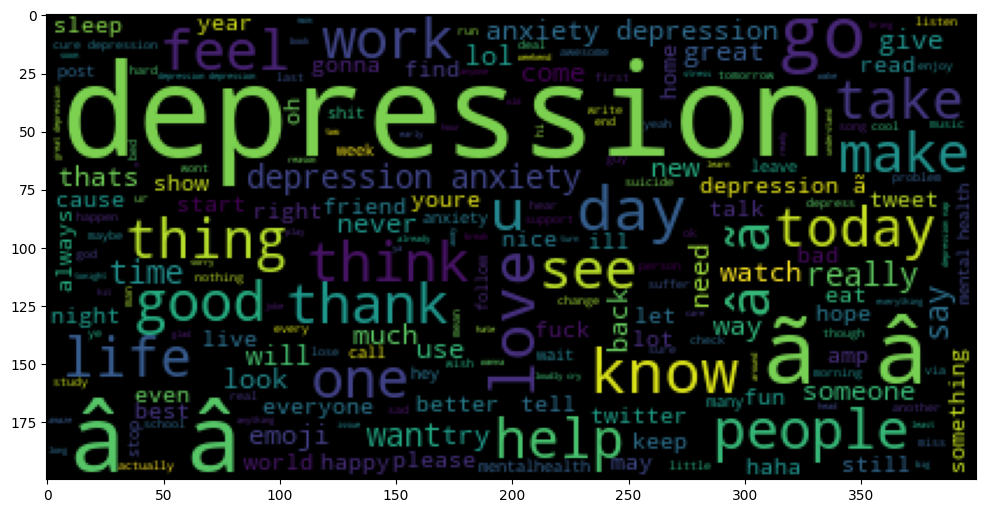

In [59]:
plt.figure(figsize = (12,8))
plt.imshow(WordCloud().generate(joined_sentences));

In [60]:
xdf['Labels'].value_counts()

Labels
1    2314
0    2314
Name: count, dtype: int64

# Let's visualize postive and negative tweets

In [61]:
positive_tweets = xdf[xdf['Labels'] == 0]
positive_sentences = positive_tweets['Tweets'].tolist()
positive_string = " ".join(positive_sentences)

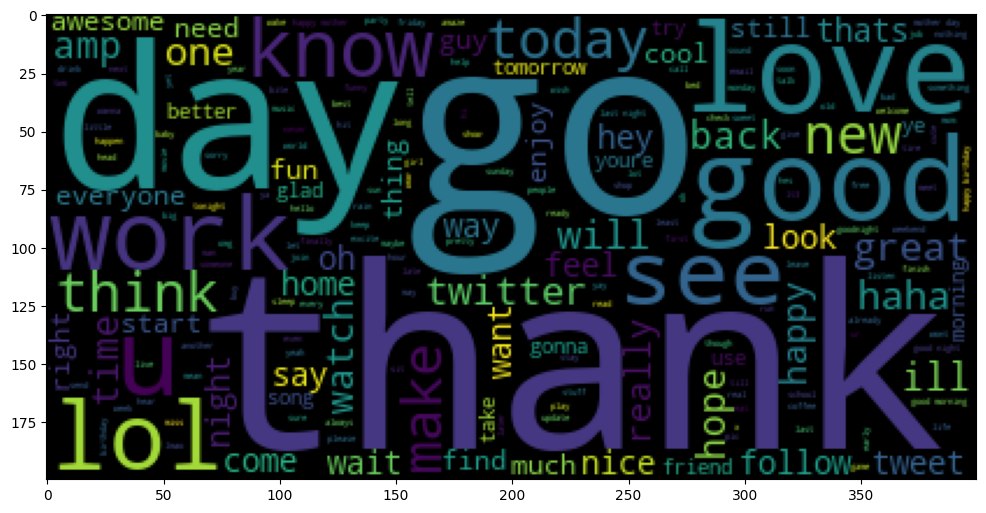

In [62]:
plt.figure(figsize = (12,8))
plt.imshow(WordCloud().generate(positive_string));

# Let's visualize negative tweets

**bold text**


In [63]:
negative_tweets = xdf[xdf['Labels'] == 1]
negative_sentences = negative_tweets['Tweets'].tolist()
negative_string = " ".join(negative_sentences)

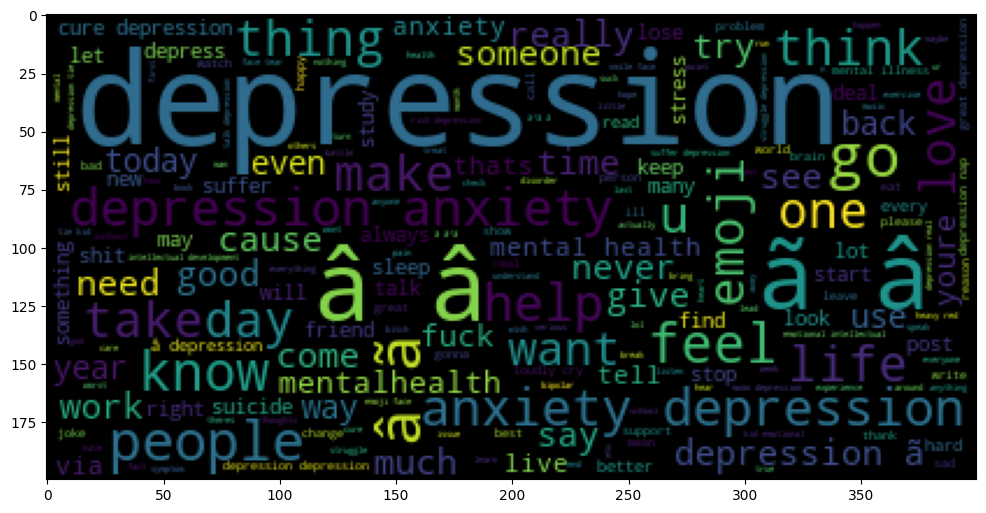

In [64]:
plt.figure(figsize = (12,8))
plt.imshow(WordCloud().generate(negative_string));

**Basic Sentiment Analaysis**
First, we will build our model with Basic Sentiment Analysis technique with tf-idf and NaiveBayes Classifier

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [66]:
cv = TfidfVectorizer()

In [67]:
tfidf = cv.fit_transform(xdf['Tweets'])

**Splitting Dataset**

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
tfX_train, tfX_test, tfy_train, tfy_test = train_test_split(tfidf, xdf['Labels'], test_size = 0.2)

In [70]:
tfX_train

<3702x9616 sparse matrix of type '<class 'numpy.float64'>'
	with 35031 stored elements in Compressed Sparse Row format>

In [71]:
tfX_train.shape

(3702, 9616)

**Models and Evaluation**

In [72]:
## NaiveBayes

from sklearn.naive_bayes import MultinomialNB

In [73]:
mnb = MultinomialNB()

In [74]:
mnb.fit(tfX_train, tfy_train)

MultinomialNB()

In [75]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred_mnb = mnb.predict(tfX_test)

print(f'Accuracy score is : {accuracy_score(tfy_test, y_pred_mnb)}')

Accuracy score is : 0.9146868250539957


In [76]:
cf = confusion_matrix(tfy_test, y_pred_mnb, labels = [1,0])
cf

array([[445,  23],
       [ 56, 402]], dtype=int64)

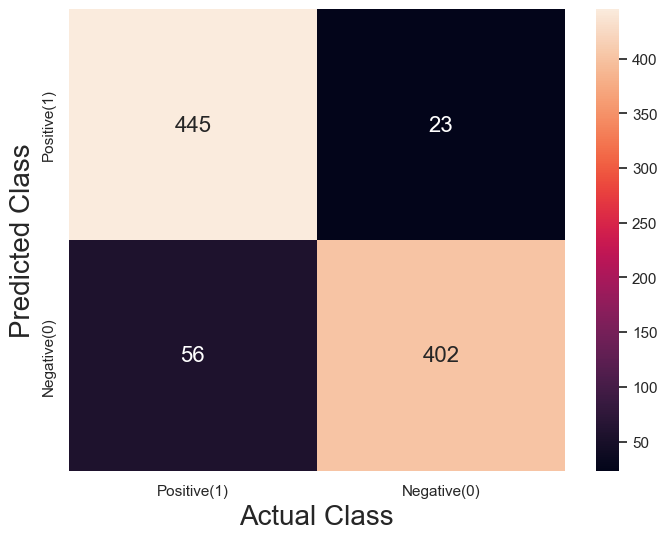

In [79]:
x_axis_labels = ["Positive(1)","Negative(0)"]
y_axis_labels = ["Positive(1)","Negative(0)"]

plt.figure(figsize = (8,6))
sns.set(font_scale=1)
sns.heatmap(cf, xticklabels = x_axis_labels, yticklabels = y_axis_labels, annot = True, fmt='g',annot_kws = {'size': 16})
plt.xlabel("Actual Class", fontsize = 20)
plt.ylabel("Predicted Class", fontsize = 20)
plt.show()

**Better Sentiment Analaysis**

In [81]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Embedding,LSTM, SimpleRNN ,Bidirectional
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
import tensorflow_hub as hub

In [82]:
# Load Pretrained Word2Vec

embed = hub.load("https://tfhub.dev/google/Wiki-words-250/2")

In [85]:
def get_max_length(df):
  ## get max token counts from train data,
  ## so we use this number as fixed length input to RNN cell

  max_length = 0
  for row in xdf['Tweets']:
    if len(row.split(" ")) > max_length:
      max_length = len(row.split(" "))

  return max_length

In [86]:
get_max_length(xdf['Tweets'])

51

In [87]:
def get_word2vec_enc(tweets):
  ## get word2vec value for each word in sentence
  # concatenate word in numpy array, so we can use it as RNN input

  encoded_tweets = []
  for tweet in tweets:
    tokens = tweet.split(" ")
    word2vec_embedding = embed(tokens)
    encoded_tweets.append(word2vec_embedding)
  return encoded_tweets

In [88]:
def get_padded_encoded_tweets(encoded_tweets):
  # for short sentences, we prepend zero padding so all input to RNN
  # has same length

  padded_tweets_encoding = []
  for enc_tweet in encoded_tweets:
    zero_padding_cnt = max_length - enc_tweet.shape[0]
    pad = np.zeros((1, 250))
    for i in range(zero_padding_cnt):
      enc_tweet = np.concatenate((pad, enc_tweet), axis = 0)
    padded_tweets_encoding.append(enc_tweet)
  return padded_tweets_encoding

In [89]:
def sentiment_encode(sentiment):
    if sentiment == 0:
        return [0,1]
    else:
        return [1,0]

In [90]:
def preprocess(df):
  # encode text value to numeric value

  tweets = df['Tweets'].tolist()

  encoded_tweets = get_word2vec_enc(tweets)
  padded_encoded_tweets = get_padded_encoded_tweets(encoded_tweets)

  #encoded sentiment
  sentiments = df['Labels'].tolist()
  encoded_sentiment = [sentiment_encode(sentiment) for sentiment in sentiments]

  X = np.array(padded_encoded_tweets)
  Y = np.array(encoded_sentiment)

  return X, Y

In [91]:
# Preprocess

max_length = get_max_length(xdf)
max_length

51

In [95]:
tdf = xdf.sample(frac = 1)
train = tdf[:3702]
test = tdf[3702:]

In [96]:
train.shape, test.shape

((3702, 3), (926, 3))

In [97]:
train_X, train_Y = preprocess(train)
test_X, test_Y = preprocess(test)

In [98]:
## Build Model

In [99]:
# LSTM

model = Sequential()
model.add(Bidirectional(LSTM(32)))
model.add(Dense(2, activation = 'softmax'))

In [100]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

**Train**

In [101]:
model.fit(train_X, train_Y, epochs = 10)

Epoch 1/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 11s 53ms/step - accuracy: 0.7680 - loss: 0.4729
Epoch 2/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - accuracy: 0.9732 - loss: 0.0865
Epoch 3/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - accuracy: 0.9799 - loss: 0.0740
Epoch 4/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.9813 - loss: 0.0629
Epoch 5/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - accuracy: 0.9859 - loss: 0.0531
Epoch 6/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - accuracy: 0.9867 - loss: 0.0474
Epoch 7/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - accuracy: 0.9869 - loss: 0.0471
Epoch 8/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - accuracy: 0.9848 - loss: 0.0509
Epoch 9/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - accuracy: 0.9838 - loss: 0.0508
Epoch 10/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - accuracy: 0.9887 - loss: 0.0463


In [102]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)        │ (None, 64)                  │          72,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 217,736 (850.54 KB)

 Trainable params: 72,578 (283.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 145,158 (567.03 KB)

**Test**

In [103]:
score, acc = model.evaluate(test_X, test_Y, verbose = 2)
print("Test Score:", score)
print("Test Accuracy:", acc)

29/29 - 1s - 34ms/step - accuracy: 0.9762 - loss: 0.0704
Test Score: 0.07038919627666473
Test Accuracy: 0.9762418866157532


In [104]:
# Confusion Matrix

y_pred = model.predict(test_X)

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step


In [105]:
import sklearn.metrics as metrics

In [106]:
matrix = metrics.confusion_matrix(test_Y.argmax(axis = 1), y_pred.argmax(axis = 1), labels = [1,0])

In [107]:
matrix

array([[467,   5],
       [ 17, 437]], dtype=int64)

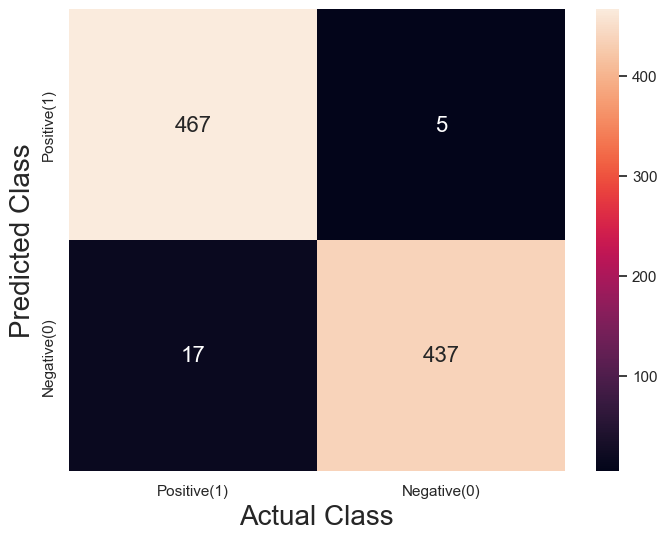

In [108]:
x_axis_labels = ["Positive(1)","Negative(0)"]
y_axis_labels = ["Positive(1)","Negative(0)"]

plt.figure(figsize = (8,6))
sns.set(font_scale=1)
sns.heatmap(matrix, xticklabels = x_axis_labels, yticklabels = y_axis_labels, annot = True, fmt='g',annot_kws = {'size': 16})
plt.xlabel("Actual Class", fontsize = 20)
plt.ylabel("Predicted Class", fontsize = 20)
plt.show()


In [119]:
def create_int_defaultdict():
    return collections.defaultdict(int)

class A:
  def funA(self):
    #create a dictionary and fill with values
    dictionary = collections.defaultdict(create_int_defaultdict)
    ...
    #then pickle to save it
    pickle.dump(dictionary, f)


    with open('model1.pkl', 'rb') as f:
        dictionary = pickle.load(f)


# Save Model
#with open('model1.pkl','wb') as f:
#     pickle.dump(model,f)

# Load model
#with open('model1.pkl', 'rb') as f:
 #   model = pickle.load(f)